In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tripData = pd.read_csv('../data/activityData/MS2611_utf8.csv')

In [3]:
# check number of trips as table
tripNumList = []
for tripNum in range(0, 15):
    countedTrips = (tripData['トリップ数'] == tripNum).sum()
    if tripNum != 0:
        countedTrips = countedTrips // tripNum
    tripNumList.append([tripNum, countedTrips])
tripNumList = np.array(tripNumList)
print(tripNumList)

[[     0  74314]
 [     1   2629]
 [     2 159478]
 [     3  29286]
 [     4  26795]
 [     5   8046]
 [     6   6014]
 [     7   1426]
 [     8    800]
 [     9    367]
 [    10    242]
 [    11    121]
 [    12     60]
 [    13     35]
 [    14     21]]


In [4]:
tripData["整理番号：市区町村"].astype(str).str.zfill(4) + tripData["整理番号：ロット番号"].astype(str).str.zfill(1) + tripData["整理番号：世帯ＳＱ"].astype(str).str.zfill(5) + tripData["個人番号"].astype(str).str.zfill(1)

0         31081000181
1         31081000181
2         31081000182
3         31081000182
4         31081000581
             ...     
693078    91536017311
693079    91536017531
693080    91536017531
693081    91536017531
693082    91536017681
Length: 693083, dtype: object

In [5]:
g = tripData.groupby("トリップ数")

In [6]:
a = [g.get_group(x) for x in g.groups]

In [7]:
a[2]

,レコード区分,回収分類,バッチ番号,整理番号：市区町村,整理番号：ロット番号,整理番号：世帯ＳＱ,世帯人数／5歳未満含む,世帯人数／5歳未満除く,回収個人票数,現住所：完全桁数,...,トリップ時間（分）,滞在時間（分）,マストラ乗車：代表交通手段,マストラ乗車：駅コード（施設）,マストラ乗車：駅地点（ゾーン）,マストラ乗車：端末手段,マストラ降車：代表交通手段,マストラ降車：駅コード（施設）,マストラ降車：駅地点（ゾーン）,マストラ降車：端末手段
0,1,1,1,3108,1,18,2,2,2,7,...,9999.0,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,3108,1,18,2,2,2,7,...,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,1,3108,1,18,2,2,2,7,...,30.0,81.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1,1,3108,1,18,2,2,2,7,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,1,3108,1,58,2,2,2,7,...,20.0,9999.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693071,2,2,999,9153,6,1622,2,2,1,7,...,30.0,NaN,5.0,1809.0,2914319.0,1.0,5.0,3825.0,6212007.0,1.0
693072,1,2,999,9153,6,1636,3,99,1,7,...,15.0,480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693073,2,2,999,9153,6,1636,3,99,1,7,...,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
693077,1,2,999,9153,6,1731,2,99,1,7,...,38.0,690.0,5.0,1709.0,810006.0,1.0,5.0,1809.0,2914319.0,1.0


<Axes: >

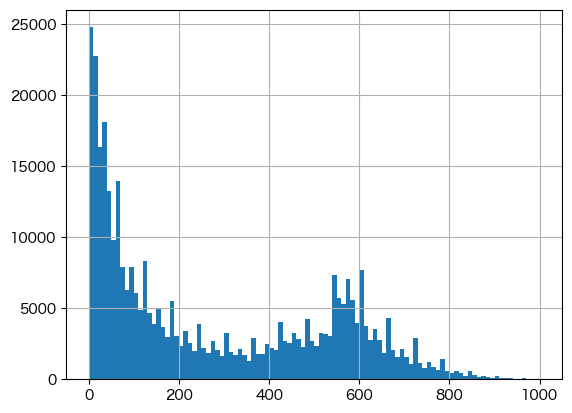

In [8]:
tripData["滞在時間（分）"].hist(bins=100, range=(0, 1000))